Size: 1000, Bubble Sort Time: 0.02165 sec, Merge Sort Time: 0.00087 sec
Size: 5000, Bubble Sort Time: 0.56255 sec, Merge Sort Time: 0.00488 sec
Size: 10000, Bubble Sort Time: 2.29691 sec, Merge Sort Time: 0.01102 sec
Size: 50000, Bubble Sort Time: 57.83961 sec, Merge Sort Time: 0.06446 sec
Size: 100000, Bubble Sort Time: 232.31784 sec, Merge Sort Time: 0.13696 sec


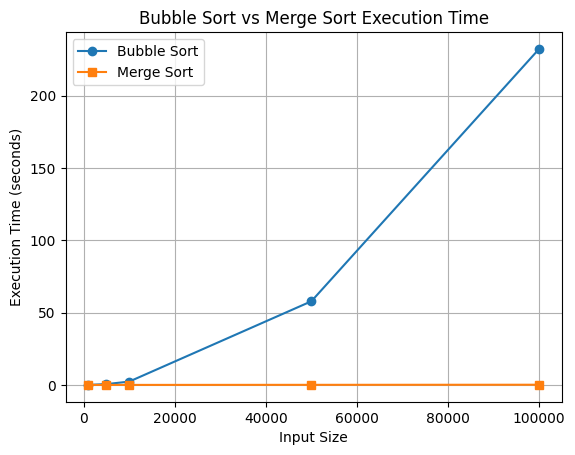

In [1]:
import time
import random
import matplotlib.pyplot as plt


def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break


def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1


def measure_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr)
    return time.time() - start_time


sizes = [1000, 5000, 10000, 50000, 100000]
bubble_sort_times = []
merge_sort_times = []

for size in sizes:
    arr = [random.randint(0, 100000) for _ in range(size)]
    arr_copy = arr[:]

    bubble_time = measure_time(bubble_sort, arr)
    merge_time = measure_time(merge_sort, arr_copy)

    bubble_sort_times.append(bubble_time)
    merge_sort_times.append(merge_time)

    print(
        f"Size: {size}, Bubble Sort Time: {bubble_time:.5f} sec, Merge Sort Time: {merge_time:.5f} sec")

plt.plot(sizes, bubble_sort_times, marker='o', label='Bubble Sort')
plt.plot(sizes, merge_sort_times, marker='s', label='Merge Sort')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Bubble Sort vs Merge Sort Execution Time')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import time
import matplotlib.pyplot as plt

def recursive_fibonacci(n):
    if n <= 0:
        return 0
    if n == 1 or n == 2:
        return 1
    return recursive_fibonacci(n - 1) + recursive_fibonacci(n - 2)

def iterative_fibonacci(n):
    if n <= 0:
        return 0
    if n == 1 or n == 2:
        return 1
    a = 1
    b = 1
    for _ in range(3, n + 1):
        c = a+b
        b = a
        a = c
    return c

def measure_time(func, n):
    start_time = time.time()
    result = func(n)  # Compute the Fibonacci number
    exec_time = time.time() - start_time
    return exec_time, result

n_values = [20, 30, 40, 45]
recursive_times = []
iterative_times = []
recursive_results = []
iterative_results = []

for n in n_values:
    rec_time, rec_result = measure_time(recursive_fibonacci, n)
    itr_time, itr_result = measure_time(iterative_fibonacci, n)

    recursive_times.append(rec_time)
    iterative_times.append(itr_time)
    recursive_results.append(rec_result)
    iterative_results.append(itr_result)

    print(f"n: {n}, Recursive Fibonacci: {rec_result}, Recursive Time: {rec_time:.5f} sec")
    print(f"n: {n}, Iterative Fibonacci: {itr_result}, Iterative Time: {itr_time:.5f} sec\n")

plt.plot(n_values, recursive_times, marker='o', label='Recursive Fibonacci')
plt.plot(n_values, iterative_times, marker='s', label='Iterative Fibonacci')
plt.xlabel('n Value')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive vs Iterative Fibonacci Execution Time')
plt.legend()
plt.grid()
plt.show()
